In [1]:
%matplotlib inline
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import readfile, utils as ut
from mintpy.simulation import fractal
import unwrap_error

work_dir = os.path.expanduser('~/Papers/2023-Yang-Tropo/notebooks/tropo_turbu')
os.chdir(work_dir)
print('Go to directory:', work_dir)

data_dir = os.path.expanduser('~/Papers/2023-Yang-Tropo/data/mintpy')

using 4 threads for pyfftw computation.
Go to directory: /Users/yunjunz/Papers/2023-Yang-Tropo/notebooks/tropo_turbu


In [2]:
ts_res_file = os.path.join(data_dir, 'timeseriesResidual_ramp.h5')
mask_file = os.path.join(data_dir, 'maskTempCoh.h5')

# read basic info
ts_obj = timeseries(ts_res_file)
ts_obj.open()
reso = np.rint(abs(float(ts_obj.metadata['Y_STEP']) * 108e3))
date_list = ts_obj.dateList[:2]
num_date = len(date_list)

open timeseries file: timeseriesResidual_ramp.h5


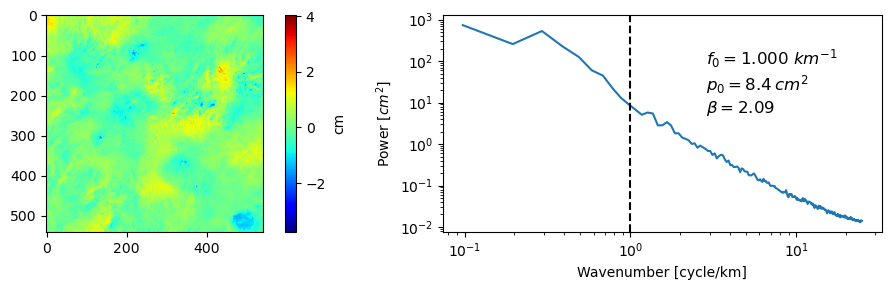

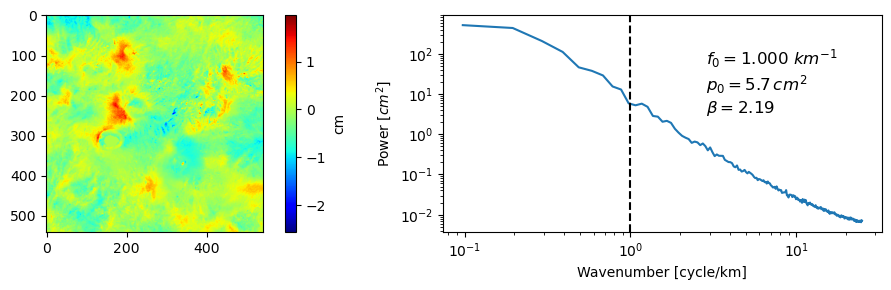

Done.


In [3]:
p0, beta = np.zeros(num_date, dtype=np.float32), np.zeros(num_date, dtype=np.float32)
p0_list, beta_list = [], []
for i, date_str in enumerate(date_list):
    res_data = readfile.read(ts_res_file, datasetName=date_str)[0]
    p0[i], beta[i] = fractal.get_power_spectral_density(res_data, resolution=reso, display=True)[:2]
print('Done.')

ValueError: x and y must have same first dimension, but have shapes (28,) and (2,)

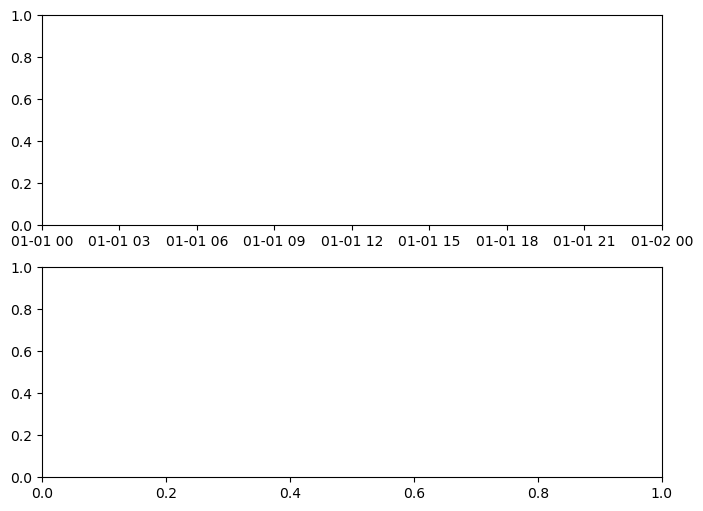

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[8, 6])
axs[0].plot(ts_obj.times, p0, '.')
axs[1].plot(ts_obj.times, beta, '.')
plt.show()

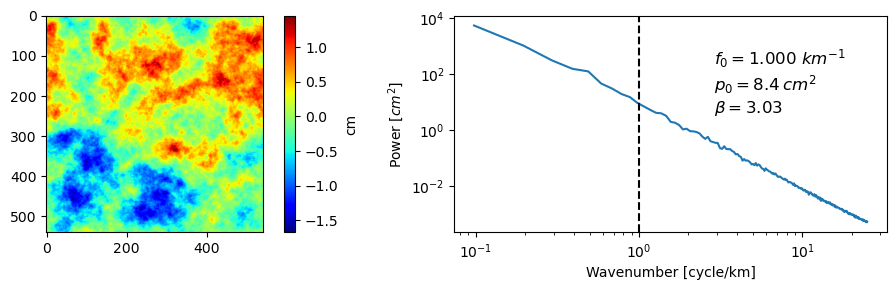

Specified p0 / beta: 8.4 cm^2, 2.09
Simulated p0 / beta: 8.4 cm^2, 3.03


In [5]:
scale = beta[0] / (8/3)
beta3 = (5/3 * scale, 8/3 * scale, 2/3 * scale)
turbu = fractal.fractal_surface_atmos(shape=(ts_obj.length, ts_obj.width), resolution=reso, p0=p0[0], beta=beta3)
p0_sim, beta_sim = fractal.get_power_spectral_density(turbu, resolution=reso, display=True)[:2]
print(f'Specified p0 / beta: {p0[0]*1e4:.1f} cm^2, {beta[0]:.02f}')
print(f'Simulated p0 / beta: {p0_sim*1e4:.1f} cm^2, {beta_sim:.02f}')

In [37]:
beta3

(1.3088305294513702, 2.0941288471221924, 0.5235322117805481)